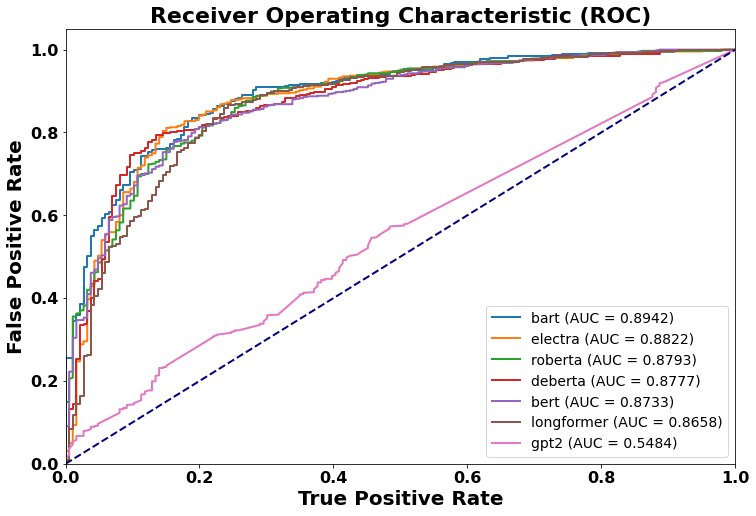

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

def read_data_from_file(file_path):
    data = np.loadtxt(file_path, delimiter='\t')
    return data[:, 1], data[:, 0], data[:, 2]  # TPR, FPR, Thresholds flipped

def plot_roc_curves():
    plt.figure(figsize=(12, 8))

    auc_values = []

    for filename in os.listdir('.'):  # Current directory
        if filename.endswith('.txt'):
            tpr, fpr, thresholds = read_data_from_file(filename)  # Flipped TPR and FPR
            roc_auc = auc(tpr, fpr)  # Flipped in AUC calculation
            auc_values.append((filename, roc_auc))

    auc_values.sort(key=lambda x: x[1], reverse=True)

    for filename, roc_auc in auc_values:
        tpr, fpr, thresholds = read_data_from_file(filename)  # Flipped TPR and FPR
        plt.plot(tpr, fpr, label=f'{filename[:-4]} (AUC = {roc_auc:.4f})', linewidth=2)

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('True Positive Rate', fontsize=20, fontweight='bold')  # Larger and bold fonts
    plt.ylabel('False Positive Rate', fontsize=20, fontweight='bold')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=22, fontweight='bold')
    
    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=14)

    plt.savefig('missom_roc', dpi=300, bbox_inches='tight')  # Higher resolution
    plt.show()

plot_roc_curves()
